In [1]:
from google.colab import drive
drive.mount('/content/drive')

workdir = "/content/drive/MyDrive/Colab Notebooks/TG/src"

# DEFININDO O DIRETÓRIO ATUAL COMO DIRETÓRIO DE REFERÊNCIA

import os
os.chdir(workdir)
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/TG/src'

In [2]:
!pip install pandas seaborn plotly ydata_profiling folium sidetable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.6/381.6 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 61.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=0a27ee02d92a897a7f9371f189c33385af78e29d701152609a1d6593c21a0e59
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

# IMPORTANDO AS BIBLIOTECAS

In [3]:
import datetime
import os
from pathlib import Path
from inspect import stack

import pandas as pd
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ydata_profiling import ProfileReport

# DEFININDO OPÇÕES GLOBAIS

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# FUNÇÕES ÚTEIS

In [7]:
def get_files_directory(path_dir, specific_type=None):

    """

        FUNÇÃO PARA OBTER ARQUIVOS DE UM DIRETÓRIO.

        É POSSÍVEL ENVIAR UM FORMATO ESPECÍFICO PARA
        FILTRO DO FORMATO DE ARQUIVO DESEJADO.
        EX: OBTER APENAS XLSX

        # Arguments
            path_dir                   - Required : Diretório analisado (String)
            specific_type              - Optional : Lista com os formatos desejados (List)

        # Returns
            list_files                 - Required : Arquivos do diretório (List)

    """

    # INICIANDO A VARIÁVEL QUE ARMAZENARÁ TODOS OS ARQUIVOS DO DIRETÓRIO
    list_files = []

    # OBTENDO TODOS OS ARQUIVOS
    try:

        # VERIFICANDO SE É DIRETÓRIO
        if os.path.isdir(path_dir):

            # OBTENDO TODOS OS ARQUIVOS EXISTENTES NO ARQUIVO
            list_files = [os.path.join(path_dir, name) for name in os.listdir(path_dir)]

            # VERIFICANDO SE UMA EXTENSÃO ESPECÍFICA FOI DEFINIDA
            if specific_type:

              # VERIFICANDO SE A EXTENSÃO É DO TIPO TUPLE/LIST
              if not isinstance(specific_type, (tuple, list)):
                  specific_type = [specific_type]

              print("FILTRANDO PARA AS EXTENSÕES: {}".format(specific_type))

              # FILTRANDO OS VALORES DA LISTA
              list_files = [arq for arq in list_files if (Path(arq).suffix in (specific_type) or str(Path(arq).suffix).replace(".", "") in (specific_type))]

        else:
            list_files = [path_dir]

    except Exception as ex:
        print("ERRO NA FUNÇÃO: {} - {}".format(stack()[0][3], ex))

    return list_files

In [8]:
def read_file(dir_name_file, csv_separator=","):

    """

      FUNÇÃO PARA LER UM ARQUIVO CSV OU EXCEL (XLS OU XLSX)
      COM OUTPUT EM FORMATO DATAFRAME

      # Arguments
          dir_name_file          - Required : Arquivo a ser lido
                                              (com o seu caminho fornecido) (Path | String)
          csv_separator          - Optional : Separador usado para caso de csv file (String)
      # Returns
          data                   - Required : Dados obtidos (DataFrame)


    """

    # INICIANDO A VARIÁVEL DE RETORNO
    data = pd.DataFrame()

    try:
      # VERIFICA SE É O ARQUIVO É CSV
      if dir_name_file.endswith('.csv'):
          data = pd.read_csv(dir_name_file, sep=csv_separator)

      # VERIFICA SE É O ARQUIVO É EXCEL
      elif dir_name_file.endswith(('.xls', '.xlsx')):
          data = pd.read_excel(dir_name_file)

      # PARA CASO NÃO CSV E NEM EXCEL, RETORNA NONE
      else:
          print("Formato de arquivo não suportado.")
          return None
    except Exception as ex:
        print("ERRO NA FUNÇÃO: {} - {}".format(stack()[0][3], ex))

    return data

In [9]:
def get_data_ghcn(data_dir, specific_type="csv"):

  """

      OBTÉM OS DADOS DO GHCN

      # Arguments
        data_dir         - Required: Onde os dados estão localizados (Path | String)
        specific_type    - Required: Tipo do arquivo que contém
                                     os dados. Pode ser csv ou excel (String)

      # Returns
          df             - Required: Dados do ghcn obtidos (DataFrame)

  """

  # INICIANDO O DATAFRAME
  df = pd.DataFrame()

  # PERCORRENDO TODOS OS ARQUIVOS QUE ESTÃO NO DIRETÓRIO
  for file in get_files_directory(data_dir,
                                  specific_type=specific_type):

    print("REALIZANDO A LEITURA - {}".format(file))

    if os.path.isfile(file):

      # REALIZANDO A LEITURA DO DATAFRAME AUXILIAR
      df_aux = read_file(file, csv_separator=",")

      # ADICIONANDO O RESULTAOD DA LEITURA AO DATAFRAME GLOBAL
      df = pd.concat([df, df_aux], ignore_index=True, axis=0)

  return df

In [10]:
def get_station_location(df, df_station,
                         column_lat="lat",
                         column_lon="lon",
                         column_elev="elev",
                         column_state="state",
                         column_city="city"):

  """

      REALIZA O MERGE DO CONJUNTO DE DADOS DO GHCN
      COM O CONJUNTO DE DADOS DAS ESTAÇÕES METEREOLÓGICAS.

      ESSA FUNÇÃO É USADA QUANDO FALTAM DADOS DAS ESTAÇÕES METEREOLÓGICAS
      COMO: LATITUDE, LONGITUDE, ELEVAÇÃO, ESTADO E CIDADE.

      PARA O MERGE UTILIZA UM LOOP SOBRE OS DADOS.

  """

  print("INICIANDO PROCESSO DE OBTENÇÃO DAS LOCALIZAÇÕES")

  # INICIANDO CONTADOR DE CRUZAMENTO OBTIDOS
  count_att_data = 0

  # CRIANDO AS COLUNAS DESEJADAS
  for column in [column_lat, column_lon, column_elev, column_state, column_city]:
    # VERIFICANDO SE A COLUNA JÁ EXISTE
    if column not in df.columns:
      # CASO NÃO EXISTA, CRIA COM VALORES VÁZIOS
      df[column] = ""

  # PERCORRENDO O DATAFRAME
  for idx, row in df.iterrows():

    # FILTANDO ESTAÇÃO METEOLÓGICA DE BUSCA
    station = row[name_column_location]

    # OBTENDO O ANO DE BUSCA
    year = row["year"]

    try:
      # DO DATASET DE ESTAÇÕES, BUSCANDO A ESTAÇÃO PELO NOME E ANO
      # DEVE SER O PRIMEIRO ANO MAIOR OU IGUAL AO ANO BUSCADO
      df_filter = df_station[(df_station["name"] == station) & ((df_station["begin_station_year"] <= year) | (df_station["end_station_year"] >= year))]

      # VERIFICANDO SE ALGUM DADO FOI OBTIDO
      if not df_filter.empty:
        # OBTENDO LATITUDE, LONGITUDE E ELEVAÇÃO DA ESTAÇÃO METEOLÓGICA
        lat, lon, elev, state, city = df_filter.iloc[0][["lat", "lon", "elev", "state", "city"]]

        # ATUALIZANDO OS VALORES NO DATAFRAME ORIGINAL
        df.at[idx, column_lat] = lat
        df.at[idx, column_lon] = lon
        df.at[idx, column_elev] = elev
        df.at[idx, column_state] = state
        df.at[idx, column_city] = city

        count_att_data +=1

    except Exception as ex:
        print(ex)

  print("PROCESSO CONCLUIDO COM SUCESSO")
  print("DADOS ATUALIZADOS PARA {} LINHAS".format(count_att_data))

  return df

In [11]:
def get_station_location_merge(df, df_station):

  """

      REALIZA O MERGE DO CONJUNTO DE DADOS DO GHCN
      COM O CONJUNTO DE DADOS DAS ESTAÇÕES METEREOLÓGICAS.

      ESSA FUNÇÃO É USADA QUANDO FALTAM DADOS DAS ESTAÇÕES METEREOLÓGICAS
      COMO: ESTADO (state) E CIDADE (city).

      PARA O MERGE UTILIZA A FUNÇÃO: pd.merge.

  """

  # REMOVENDO DUPLICIDADES DO CONJUNTO DE DADOS DE ESTAÇÕES
  df_station = df_station.drop_duplicates(subset=["name"])

  # REALIZANDO O MERGE ENTRE O CONJUNTO DE DADOS DO GHCN E OS DADOS DAS ESTAÇÕES
  df_merge_station = pd.merge(df, df_station[["name", "state", "city"]],
                              left_on="name", right_on="name",
                              how="left",
                              suffixes=("_GHCN", "_STATION"))

  # DROPANDO AS COLUNAS ANTERIORES
  df_merge_station = df_merge_station.drop(["state_GHCN"], axis=1)

  # RENOMEANDO AS COLUNAS PARA O NOME ANTERIOR
  df_merge_station = df_merge_station.rename(columns={"state_STATION": "state"})

  return df_merge_station

# VARIÁVEIS GLOBAIS

In [12]:
# DIRETÓRIO ONDE ESTÃO OS DADOS
data_dir = 'data/3_PRE_PROCESSING_DATASET_GHCN_DAILY/data_brazil_daily.csv'

# FORMATO DESEJADO
specific_type = "csv"

In [13]:
# DATASET CONTENDO OS DADOS DAS ESTAÇÕES CLIMÁTICAS
dir_stations = 'data/2_DATA_STATIONS_ENRICHMENT/data_station_with_result_api.xlsx'

In [14]:
# NOME DA COLUNA QUE CONTÉM AS INFORMAÇÕES DAS ESTAÇÕES CLIMÁTICAS
name_column_location = "name"

In [15]:
# LISTA DE COLUNAS PARA REMOVER DO DATASET
list_columns_to_drop = ["temp"]

In [16]:
# LISTA DE COLUNAS PARA RENOMEAR
list_columns_to_rename = {"temp_celsius": "temp"}

In [17]:
# VARIÁVEL QUE INDICA SE DEVE USAR O DATAFRAME STATIONS COMO FONTE DE INFORMAÇÃO
validator_get_value_location_using_dataframe_stations = True

# INDICANDO QUAL A FUNÇÃO SERÁ UTILIZADA PARA O MERGE DOS DADOS
get_value_location_using_dataframe_stations_function = get_station_location_merge

# OBTENDO OS DADOS DO GHCN-DAILY

> Global Historical Climatology Network - Daily, Version 4
(NOAA GHCN v4)

Esses dados são obtidos pela pipeline construida em:

https://github.com/emersonrafaels/tg_series_temporais_otimizacao_gerenciamento_energia/tree/main/src/data/1_GET_DATA/GHCN_DAILY_WEATHER_DATA.ipynb

In [18]:
df = get_data_ghcn(data_dir=data_dir,
                   specific_type=specific_type)

REALIZANDO A LEITURA - data/3_PRE_PROCESSING_DATASET_GHCN_DAILY/data_brazil_daily.csv


In [19]:
df

,stn,year,month,day,name,country,state,lat,lon,begin,end,temp,prcp,wdsp,sndp,temp_celsius
0,821930,1942,10,17,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,80.2,99.99,4.3,NaN,26.777778
1,821930,1942,10,16,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,77.8,99.99,4.1,NaN,25.444444
2,821930,1942,10,30,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,81.5,0.00,10.0,NaN,27.500000
3,821930,1942,10,31,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,81.3,0.00,9.6,NaN,27.388889
4,821930,1942,11,1,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,81.4,0.00,8.8,NaN,27.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360190,869960,2023,4,13,JAGUARAO,BR,NaN,-32.554,-53.376,20160704,20210920,60.9,0.00,0.3,NaN,16.055556
2360191,869960,2023,7,8,JAGUARAO,BR,NaN,-32.554,-53.376,20160704,20210920,57.4,0.00,0.0,NaN,14.111111
2360192,869960,2023,6,13,JAGUARAO,BR,NaN,-32.554,-53.376,20160704,20210920,45.1,0.00,0.0,NaN,7.277778
2360193,869960,2023,7,10,JAGUARAO,BR,NaN,-32.554,-53.376,20160704,20210920,56.4,0.00,0.0,NaN,13.555556


In [20]:
df.head()

,stn,year,month,day,name,country,state,lat,lon,begin,end,temp,prcp,wdsp,sndp,temp_celsius
0,821930,1942,10,17,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,80.2,99.99,4.3,NaN,26.777778
1,821930,1942,10,16,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,77.8,99.99,4.1,NaN,25.444444
2,821930,1942,10,30,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,81.5,0.00,10.0,NaN,27.500000
3,821930,1942,10,31,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,81.3,0.00,9.6,NaN,27.388889
4,821930,1942,11,1,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,81.4,0.00,8.8,NaN,27.444444


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360195 entries, 0 to 2360194
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   stn           int64  
 1   year          int64  
 2   month         int64  
 3   day           int64  
 4   name          object 
 5   country       object 
 6   state         float64
 7   lat           float64
 8   lon           float64
 9   begin         int64  
 10  end           int64  
 11  temp          float64
 12  prcp          float64
 13  wdsp          float64
 14  sndp          float64
 15  temp_celsius  float64
dtypes: float64(8), int64(6), object(2)
memory usage: 288.1+ MB


In [22]:
df.describe()

,stn,year,month,day,state,lat,lon,begin,end,temp,prcp,wdsp,sndp,temp_celsius
count,2.360195e+06,2.360195e+06,2.360195e+06,2.360195e+06,0.0,2.360195e+06,2.360195e+06,2.360195e+06,2.360195e+06,2.360195e+06,2.360195e+06,2.318665e+06,184.000000,2.360195e+06
mean,8.405735e+05,2.006799e+03,6.577644e+00,1.572959e+01,NaN,-1.573033e+01,-4.802224e+01,1.983148e+07,2.020418e+07,7.553623e+01,1.117609e+01,4.846609e+00,2.066304,2.418679e+01
std,1.817108e+04,1.683529e+01,3.417760e+00,8.808128e+00,NaN,8.813359e+00,7.564713e+00,3.091393e+05,3.603746e+04,7.826132e+00,3.144427e+01,3.024920e+00,2.624903,4.347851e+00
min,7.490240e+05,1.942000e+03,1.000000e+00,1.000000e+00,NaN,-3.375000e+01,-7.278700e+01,1.931010e+07,1.945092e+07,1.790000e+01,0.000000e+00,0.000000e+00,0.400000,-7.833333e+00
25%,8.259500e+05,1.996000e+03,4.000000e+00,8.000000e+00,NaN,-2.287500e+01,-5.238900e+01,1.961010e+07,2.021092e+07,7.120000e+01,0.000000e+00,2.700000e+00,0.800000,2.177778e+01
50%,8.364900e+05,2.016000e+03,7.000000e+00,1.600000e+01,NaN,-1.663200e+01,-4.795000e+01,1.977050e+07,2.021092e+07,7.700000e+01,0.000000e+00,4.400000e+00,2.000000,2.500000e+01
75%,8.664700e+05,2.019000e+03,1.000000e+01,2.300000e+01,NaN,-8.126000e+00,-4.295000e+01,2.016070e+07,2.021092e+07,8.090000e+01,0.000000e+00,6.500000e+00,2.400000,2.716667e+01
max,8.699800e+05,2.023000e+03,1.200000e+01,3.100000e+01,NaN,3.867000e+00,-2.931700e+01,2.020120e+07,2.021092e+07,1.065000e+02,9.999000e+01,5.240000e+01,31.100000,4.138889e+01


## REMOVENDO COLUNAS NÃO DESEJADAS

In [23]:
# REALIZANDO UMA CÓPIA DO DATAFRAME ORIGINAL
df_original = df.copy()

In [24]:
df = df.drop(list_columns_to_drop, axis=1)

## RENOMEANDO COLUNAS DESEJADAS

In [25]:
df = df.rename(columns=list_columns_to_rename)

## VISUALIZANDO RESULTADO

In [26]:
df.head()

,stn,year,month,day,name,country,state,lat,lon,begin,end,prcp,wdsp,sndp,temp
0,821930,1942,10,17,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,99.99,4.3,NaN,26.777778
1,821930,1942,10,16,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,99.99,4.1,NaN,25.444444
2,821930,1942,10,30,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,0.00,10.0,NaN,27.500000
3,821930,1942,10,31,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,0.00,9.6,NaN,27.388889
4,821930,1942,11,1,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,0.00,8.8,NaN,27.444444


# CRIANDO COLUNA DATA - DATASET GHCN

A coluna 'measurement date' une as informações de dia, mês e ano da medição

In [27]:
df["measurement date"] = df.apply(lambda x: datetime.datetime(x["year"],
                                                              x["month"],
                                                              x["day"]),
                                  axis=1)

In [28]:
df.head()

,stn,year,month,day,name,country,state,lat,lon,begin,end,prcp,wdsp,sndp,temp,measurement date
0,821930,1942,10,17,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,99.99,4.3,NaN,26.777778,1942-10-17
1,821930,1942,10,16,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,99.99,4.1,NaN,25.444444,1942-10-16
2,821930,1942,10,30,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,0.00,10.0,NaN,27.500000,1942-10-30
3,821930,1942,10,31,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,0.00,9.6,NaN,27.388889,1942-10-31
4,821930,1942,11,1,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,0.00,8.8,NaN,27.444444,1942-11-01


# OBTENDO OS DADOS DE ESTAÇÕES METEOLÓGICAS

Esses dados são obtidos pela pipeline construida em:

https://github.com/emersonrafaels/tg_series_temporais_otimizacao_gerenciamento_energia/tree/main/src/data/2_DATA_STATIONS_ENRICHMENT/GET_INFORMATIONS_STATIONS.ipynb

In [29]:
# INICIANDO O DATAFRAME
df_station = read_file(dir_stations)

In [30]:
df_station.head()

,name,country,state,lat,lon,elev,begin_station,end_station,begin_station_year,end_station_year,information,city
0,ABROLHOS,BR,Bahia,-17.967,-38.700,38.0,19790112,20210920,1979,2021,"{'place_id': 307792151, 'licence': 'Data © Ope...",NaN
1,ABROLHOS,BR,Bahia,-17.967,-38.700,26.5,20160704,20201027,2016,2020,"{'place_id': 307792151, 'licence': 'Data © Ope...",NaN
2,ACARAU,BR,Ceará,-3.117,-40.083,77.5,20160704,20200220,2016,2020,"{'place_id': 177979907, 'licence': 'Data © Ope...",Bela Cruz
3,AFONSO PENA,BR,Paraná,-25.528,-49.176,910.7,19610101,20210920,1961,2021,"{'place_id': 234662604, 'licence': 'Data © Ope...",NaN
4,AGUA BOA,BR,Mato Grosso,-14.017,-52.217,433.5,20160704,20210727,2016,2021,"{'place_id': 279599105, 'licence': 'Data © Ope...",Água Boa


In [31]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                941 non-null    object 
 1   country             941 non-null    object 
 2   state               934 non-null    object 
 3   lat                 937 non-null    float64
 4   lon                 937 non-null    float64
 5   elev                937 non-null    float64
 6   begin_station       941 non-null    int64  
 7   end_station         941 non-null    int64  
 8   begin_station_year  941 non-null    int64  
 9   end_station_year    941 non-null    int64  
 10  information         935 non-null    object 
 11  city                540 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 88.3+ KB


In [32]:
df_station.describe()

,lat,lon,elev,begin_station,end_station,begin_station_year,end_station_year
count,937.000000,937.000000,937.000000,9.410000e+02,9.410000e+02,941.000000,941.000000
mean,-15.457863,-47.819308,378.277695,1.992879e+07,2.015986e+07,1992.817216,2015.904357
std,8.473399,7.393010,362.592961,2.914832e+05,1.403735e+05,29.135278,14.032386
min,-33.750000,-72.787000,-999.900000,1.931010e+07,1.931093e+07,1931.000000,1931.000000
25%,-22.333000,-52.233000,79.000000,1.974061e+07,2.020030e+07,1974.000000,2020.000000
50%,-15.900000,-47.617000,302.500000,2.010111e+07,2.021092e+07,2010.000000,2021.000000
75%,-8.283000,-42.317000,617.000000,2.016070e+07,2.021092e+07,2016.000000,2021.000000
max,3.867000,-29.317000,1811.500000,2.021082e+07,2.021092e+07,2021.000000,2021.000000


## ORDENANDO O DATASET

In [33]:
df_station = df_station.sort_values(by=["name", "begin_station", "end_station"], ascending=True)

## REALIZANDO O JOIN DOS DADOS

Como precisamos obter a localização metereológica com cruzamento por estação e ano, realizamos usando uma função

In [34]:
# VALIDANDO SE É NECESSÁRIO O MERGEM COM OS DADOS DO CONJUNTO DE ESTAÇÕES
if validator_get_value_location_using_dataframe_stations:

  df_join_ghcn_station = get_value_location_using_dataframe_stations_function(df=df, df_station=df_station)
  print("OPÇÃO DE CRUZAMENTO: {} - CRUZAMENTO REALIZADO COM SUCESSO UTILIZANDO A FUNÇÃO: {}".format(validator_get_value_location_using_dataframe_stations,
                                                                                                    get_value_location_using_dataframe_stations_function))

else:
  df_join_ghcn_station = df.copy()
  print("OPÇÃO DE CRUZAMENTO: {}".format(validator_get_value_location_using_dataframe_stations))

OPÇÃO DE CRUZAMENTO: True - CRUZAMENTO REALIZADO COM SUCESSO UTILIZANDO A FUNÇÃO: <function get_station_location_merge at 0x7e6d092b6e60>


## VISUALIZANDO O RESULTADO DO JOIN

In [35]:
df_join_ghcn_station

,stn,year,month,day,name,country,lat,lon,begin,end,prcp,wdsp,sndp,temp,measurement date,state,city
0,821930,1942,10,17,VAL DE CANS INTL,BR,-1.379,-48.476,19421001,20210920,99.99,4.3,NaN,26.777778,1942-10-17,Pará,NaN
1,821930,1942,10,16,VAL DE CANS INTL,BR,-1.379,-48.476,19421001,20210920,99.99,4.1,NaN,25.444444,1942-10-16,Pará,NaN
2,821930,1942,10,30,VAL DE CANS INTL,BR,-1.379,-48.476,19421001,20210920,0.00,10.0,NaN,27.500000,1942-10-30,Pará,NaN
3,821930,1942,10,31,VAL DE CANS INTL,BR,-1.379,-48.476,19421001,20210920,0.00,9.6,NaN,27.388889,1942-10-31,Pará,NaN
4,821930,1942,11,1,VAL DE CANS INTL,BR,-1.379,-48.476,19421001,20210920,0.00,8.8,NaN,27.444444,1942-11-01,Pará,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360190,869960,2023,4,13,JAGUARAO,BR,-32.554,-53.376,20160704,20210920,0.00,0.3,NaN,16.055556,2023-04-13,Rio Grande do Sul,Jaguarão
2360191,869960,2023,7,8,JAGUARAO,BR,-32.554,-53.376,20160704,20210920,0.00,0.0,NaN,14.111111,2023-07-08,Rio Grande do Sul,Jaguarão
2360192,869960,2023,6,13,JAGUARAO,BR,-32.554,-53.376,20160704,20210920,0.00,0.0,NaN,7.277778,2023-06-13,Rio Grande do Sul,Jaguarão
2360193,869960,2023,7,10,JAGUARAO,BR,-32.554,-53.376,20160704,20210920,0.00,0.0,NaN,13.555556,2023-07-10,Rio Grande do Sul,Jaguarão


In [36]:
df_join_ghcn_station.head()

,stn,year,month,day,name,country,lat,lon,begin,end,prcp,wdsp,sndp,temp,measurement date,state,city
0,821930,1942,10,17,VAL DE CANS INTL,BR,-1.379,-48.476,19421001,20210920,99.99,4.3,NaN,26.777778,1942-10-17,Pará,NaN
1,821930,1942,10,16,VAL DE CANS INTL,BR,-1.379,-48.476,19421001,20210920,99.99,4.1,NaN,25.444444,1942-10-16,Pará,NaN
2,821930,1942,10,30,VAL DE CANS INTL,BR,-1.379,-48.476,19421001,20210920,0.00,10.0,NaN,27.500000,1942-10-30,Pará,NaN
3,821930,1942,10,31,VAL DE CANS INTL,BR,-1.379,-48.476,19421001,20210920,0.00,9.6,NaN,27.388889,1942-10-31,Pará,NaN
4,821930,1942,11,1,VAL DE CANS INTL,BR,-1.379,-48.476,19421001,20210920,0.00,8.8,NaN,27.444444,1942-11-01,Pará,NaN


### VISUALIZANDO O RESULTADO PARA UMA ÚNICA ESTAÇÃO METEREOLÓGICA

In [37]:
df_station[df_station["name"] == "VAL DE CANS INTL"]

,name,country,state,lat,lon,elev,begin_station,end_station,begin_station_year,end_station_year,information,city
917,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,16.5,19421001,20210920,1942,2021,"{'place_id': 157815152, 'licence': 'Data © Ope...",NaN


In [38]:
df_join_ghcn_station[df_join_ghcn_station["name"] == "VAL DE CANS INTL"].head()

,stn,year,month,day,name,country,lat,lon,begin,end,prcp,wdsp,sndp,temp,measurement date,state,city
0,821930,1942,10,17,VAL DE CANS INTL,BR,-1.379,-48.476,19421001,20210920,99.99,4.3,NaN,26.777778,1942-10-17,Pará,NaN
1,821930,1942,10,16,VAL DE CANS INTL,BR,-1.379,-48.476,19421001,20210920,99.99,4.1,NaN,25.444444,1942-10-16,Pará,NaN
2,821930,1942,10,30,VAL DE CANS INTL,BR,-1.379,-48.476,19421001,20210920,0.00,10.0,NaN,27.500000,1942-10-30,Pará,NaN
3,821930,1942,10,31,VAL DE CANS INTL,BR,-1.379,-48.476,19421001,20210920,0.00,9.6,NaN,27.388889,1942-10-31,Pará,NaN
4,821930,1942,11,1,VAL DE CANS INTL,BR,-1.379,-48.476,19421001,20210920,0.00,8.8,NaN,27.444444,1942-11-01,Pará,NaN


# CRIANDO UM SÉRIE TEMPORAL PARA CADA LOCALIDADE

In [39]:
# INICIANDO O DICT DE ESTAÇÕES
dict_dataset_stations = {}
dataset_stations = pd.DataFrame()

# PERCORRENDO CADA UMA DAS ESTAÇÕES
for station in df_join_ghcn_station["name"].unique():

  # FILTRANDO A ESTAÇÃO METEOLÓGICA
  df_station_filter = df_join_ghcn_station[df["name"] == station]

  # DEFININDO A DATA COMO INDEX
  df_station_filter = df_station_filter.set_index('measurement date')

  # ORDENANDO DE FORMA ASCENDENTE OS DADOS PELO INDEX
  df_station_filter = df_station_filter.sort_index(ascending=True)

  # DEFININDO A FREQUÊNCIA COMO MENSAL
  df_station_filter_monthly = df_station_filter.resample("D").first()

  # PREENCHENDO OS VALORES NULOS COM O ÚLTIMO VALOR PREENCHIDO
  df_station_filter_monthly = df_station_filter_monthly.fillna(method='ffill')

  # SALVANDO NO DICT
  dict_dataset_stations[station] = df_station_filter_monthly

  # REALIZANDO O APPEND NO DATAFRAME
  dataset_stations = pd.concat([dataset_stations, df_station_filter_monthly], axis=0)

# ANÁLISE EXPLORATÓRIA

## PROFILING DO DATASET

### DATASET GHCN (ANTES DA CRIAÇÃO DAS SÉRIES TEMPORAIS POR ESTAÇÃO)

In [40]:
type_schema = {"name": "categorical",
               "state": "categorical",
               "city": "categorical"}

In [41]:
profile = ProfileReport(df,
                        title="Profiling - GHCN - DAILY",
                        type_schema=type_schema,
                        minimal=True)

In [42]:
profile.to_file("data/profilings/profiling_ghcn_daily.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/plot.py:392: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, np.sum(data))


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### ANALISANDO VALORES FALTANTES

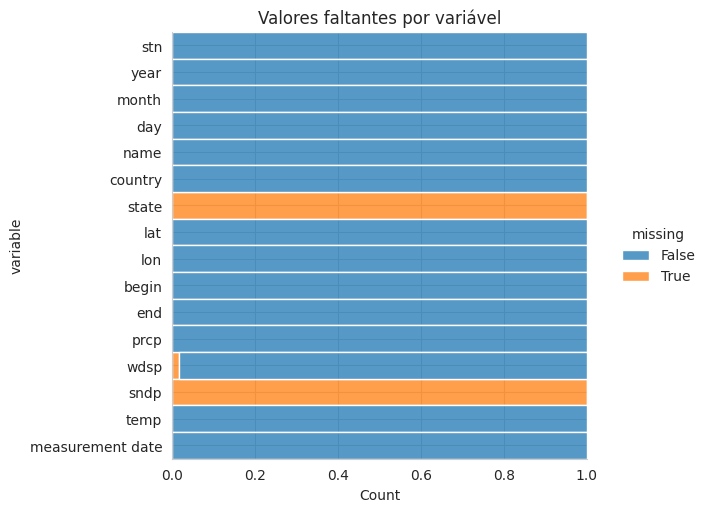

In [43]:
sns.set_style("whitegrid")

p = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

p.fig.set_dpi(100)

plt.title('Valores faltantes por variável')
plt.show()
p.savefig("data/3_PRE_PROCESSING_DATASET_GHCN_DAILY/plot_ghcn_daily_missing_values.png")

In [44]:
df.stb.missing()

,missing,total,percent
state,2360195,2360195,100.000000
sndp,2360011,2360195,99.992204
wdsp,41530,2360195,1.759600
stn,0,2360195,0.000000
year,0,2360195,0.000000
month,0,2360195,0.000000
day,0,2360195,0.000000
name,0,2360195,0.000000
country,0,2360195,0.000000
lat,0,2360195,0.000000


#### QUANTIDADE DE ESTAÇÕES DISTINTAS

In [45]:
count_state = df[name_column_location].nunique()
count_state

652

### DATASET GHCN (APÓS A CRIAÇÃO DAS SÉRIES TEMPORAIS POR ESTAÇÃO)

In [46]:
type_schema = {"name": "categorical",
               "state": "categorical",
               "city": "categorical"}

In [47]:
profile = ProfileReport(dataset_stations.reset_index(),
                        title="Profiling - GHCN - STATIONS",
                        type_schema=type_schema,
                        minimal=True)

In [48]:
profile.to_file("data/profilings/profiling_ghcn_daily_stations.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### ANALISANDO VALORES FALTANTES

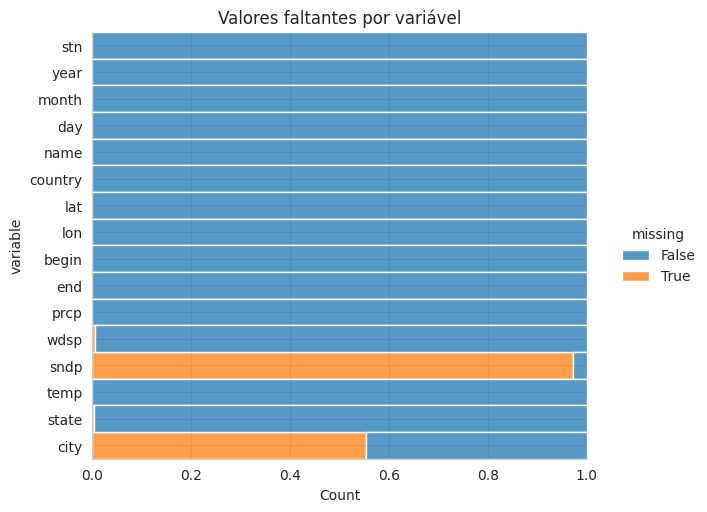

In [49]:
sns.set_style("whitegrid")

p = sns.displot(
    data=dataset_stations.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

p.fig.set_dpi(100)

plt.title('Valores faltantes por variável')
plt.show()
p.savefig("data/3_PRE_PROCESSING_DATASET_GHCN_DAILY/plot_ghcn_daily_stations_missing_values.png")

In [50]:
dataset_stations.stb.missing()

,missing,total,percent
sndp,4693579,4830516,97.165168
city,2677344,4830516,55.425632
wdsp,28181,4830516,0.583395
state,17327,4830516,0.358699
stn,0,4830516,0.000000
year,0,4830516,0.000000
month,0,4830516,0.000000
day,0,4830516,0.000000
name,0,4830516,0.000000
country,0,4830516,0.000000


#### QUANTIDADE DE ESTAÇÕES DISTINTAS

In [51]:
count_state = dataset_stations[name_column_location].nunique()
count_state

652

# EXPORTANDO DADOS

## DATASET CONTENDO O DATASET COM SÉRIES TEMPORAIS DIÁRIAS

In [53]:
dataset_stations.to_csv("data/4_RESULTS_DATASET_GHCN_DAILY/dataset_ghcn_group_freq_daily.csv")